In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import requests
from io import BytesIO
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

In [32]:
images = np.load("../star_coor_area_MLP.npy")
print(images.shape)
labels = np.load("../labels_MLP.npy")
print(labels.shape)

(1728, 67)
(1728,)


In [15]:
label_mapping = {'Cas': 0, 'Gem': 1, 'Ori': 2, 'Per': 3, 'ST': 4, 'UM': 5}
labels_mapped = [label_mapping[label] for label in labels]
labels_encoded = to_categorical(labels_mapped, num_classes=6)

In [16]:

def create_mlp_model(input_shape):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=input_shape))

    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(6, activation='softmax'))
    return model

# mlp_model = create_mlp_model((images.shape[1], 1))

# mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
# mlp_model.summary()

In [10]:
accu_nocos = []
f1_nocos = []
for k in range(16):
  images_coor_area = images[:, :(k+2)*3]
  x_train, x_test, y_train, y_test = train_test_split(images_coor_area, labels_encoded, test_size=0.2, random_state=888)
  accu_iter = []
  f1_iter = []
  for i in range(10):
    mlp_model = create_mlp_model((x_train.shape[1], 1))
    mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    mlp_model.fit(
      x_train,
      y_train,
      epochs=15,
      batch_size=64,
    )
    predicted_test_probmlp = mlp_model.predict(x_test)
    predicted_test_labelsmlp = np.argmax(predicted_test_probmlp, axis=1)
    accu_iter.append(accuracy_score(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labelsmlp))
    f1_iter.append(f1_score(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labelsmlp, average = 'macro'))
  accu_nocos.append(np.mean(accu_iter))
  f1_nocos.append(np.mean(f1_iter))

Epoch 1/15
22/22 [==============================] - 2s 2ms/step - loss: 1.8197 - accuracy: 0.1686
Epoch 2/15
22/22 [==============================] - 0s 9ms/step - loss: 1.7976 - accuracy: 0.1657
Epoch 3/15
22/22 [==============================] - 0s 4ms/step - loss: 1.7685 - accuracy: 0.2077
Epoch 4/15
22/22 [==============================] - 0s 4ms/step - loss: 1.7530 - accuracy: 0.2258
Epoch 5/15
22/22 [==============================] - 0s 5ms/step - loss: 1.7350 - accuracy: 0.2344
Epoch 6/15
22/22 [==============================] - 0s 5ms/step - loss: 1.7315 - accuracy: 0.2511
Epoch 7/15
22/22 [==============================] - 0s 9ms/step - loss: 1.7050 - accuracy: 0.2590
Epoch 8/15
22/22 [==============================] - 0s 4ms/step - loss: 1.6906 - accuracy: 0.2779
Epoch 9/15
22/22 [==============================] - 0s 4ms/step - loss: 1.6730 - accuracy: 0.2988
Epoch 10/15
22/22 [==============================] - 0s 4ms/step - loss: 1.6702 - accuracy: 0.2887
Epoch 11/15
22/22 [

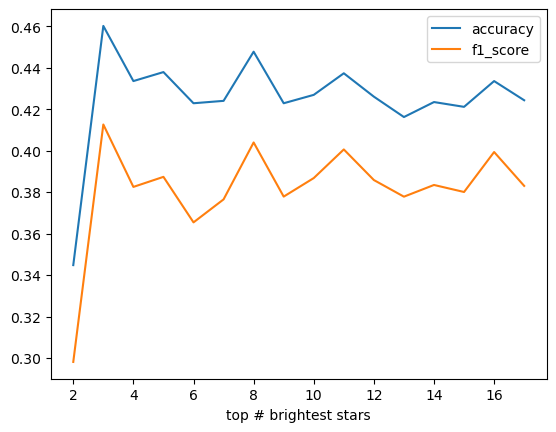

In [11]:
plt.plot(list(range(2,18)), accu_nocos, label="accuracy")
plt.plot(list(range(2,18)), f1_nocos, label="f1_score")
plt.xlabel("top # brightest stars")
plt.title("")
plt.legend()

In [6]:
accu = []
f1 = []
for k in range(16):
  images_coor_area = images[:, :(k+2)*3]
  images_cosine = images[:, 51:(51+k+1)]
  images_new = np.concatenate((images_coor_area, images_cosine), axis=1)
  x_train, x_test, y_train, y_test = train_test_split(images_new, labels_encoded, test_size=0.2, random_state=888)
  accu_iter = []
  f1_iter = []
  for i in range(10):
    mlp_model = create_mlp_model((x_train.shape[1], 1))
    mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    mlp_model.fit(
      x_train,
      y_train,
      epochs=15,
      batch_size=64,
    )
    predicted_test_probmlp = mlp_model.predict(x_test)
    predicted_test_labelsmlp = np.argmax(predicted_test_probmlp, axis=1)
    accu_iter.append(accuracy_score(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labelsmlp))
    f1_iter.append(f1_score(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labelsmlp, average = 'macro'))
  accu.append(np.mean(accu_iter))
  f1.append(np.mean(f1_iter))


2023-11-30 12:20:33.021551: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/15
22/22 [==============================] - 1s 4ms/step - loss: 1.8343 - accuracy: 0.1512
Epoch 2/15
22/22 [==============================] - 0s 4ms/step - loss: 1.7856 - accuracy: 0.1903
Epoch 3/15
22/22 [==============================] - 0s 11ms/step - loss: 1.7831 - accuracy: 0.1823
Epoch 4/15
22/22 [==============================] - 0s 3ms/step - loss: 1.7683 - accuracy: 0.2171
Epoch 5/15
22/22 [==============================] - 0s 3ms/step - loss: 1.7648 - accuracy: 0.2178
Epoch 6/15
22/22 [==============================] - 0s 2ms/step - loss: 1.7226 - accuracy: 0.2496
Epoch 7/15
22/22 [==============================] - 0s 2ms/step - loss: 1.6950 - accuracy: 0.2554
Epoch 8/15
22/22 [==============================] - 0s 3ms/step - loss: 1.6861 - accuracy: 0.2511
Epoch 9/15
22/22 [==============================] - 0s 3ms/step - loss: 1.6717 - accuracy: 0.2902
Epoch 10/15
22/22 [==============================] - 0s 3ms/step - loss: 1.6758 - accuracy: 0.3032
Epoch 11/15
22/22 

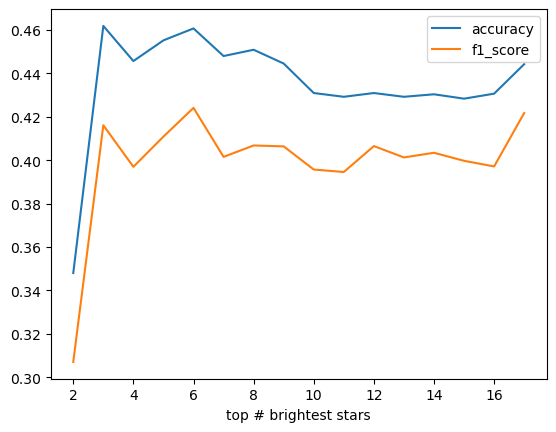

In [12]:
plt.plot(list(range(2,18)), accu, label="accuracy")
plt.plot(list(range(2,18)), f1, label="f1_score")
plt.xlabel("top # brightest stars")
plt.title("add co")
plt.legend()

So max_star=6

In [18]:
images[:, :6*3].shape

(1728, 18)

In [19]:
images[:, 51:(51+5)].shape

(1728, 5)

In [28]:
images_coor_area = images[:, :6*3]
images_cosine = images[:, 51:(51+5)]
images_new = np.concatenate((images_coor_area, images_cosine), axis=1)
x_train, x_test, y_train, y_test = train_test_split(images_new, labels_encoded, test_size=0.2, random_state=888)
accu_iter = []
f1_iter = []
for i in range(10):
  mlp_model = create_mlp_model((x_train.shape[1], 1))
  mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  mlp_model.fit(
    x_train,
    y_train,
    epochs=15,
    batch_size=64,
  )
  predicted_test_probmlp = mlp_model.predict(x_test)
  predicted_test_labelsmlp = np.argmax(predicted_test_probmlp, axis=1)
  accu_iter.append(accuracy_score(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labelsmlp))
  f1_iter.append(f1_score(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labelsmlp, average = 'macro'))

Epoch 1/15
22/22 [==============================] - 1s 4ms/step - loss: 1.8768 - accuracy: 0.1744
Epoch 2/15
22/22 [==============================] - 0s 10ms/step - loss: 1.8006 - accuracy: 0.1787
Epoch 3/15
22/22 [==============================] - 0s 7ms/step - loss: 1.7840 - accuracy: 0.1939
Epoch 4/15
22/22 [==============================] - 0s 6ms/step - loss: 1.7631 - accuracy: 0.2185
Epoch 5/15
22/22 [==============================] - 0s 5ms/step - loss: 1.7583 - accuracy: 0.2402
Epoch 6/15
22/22 [==============================] - 0s 6ms/step - loss: 1.7241 - accuracy: 0.2569
Epoch 7/15
22/22 [==============================] - 0s 6ms/step - loss: 1.6946 - accuracy: 0.2938
Epoch 8/15
22/22 [==============================] - 0s 11ms/step - loss: 1.6383 - accuracy: 0.3039
Epoch 9/15
22/22 [==============================] - 0s 7ms/step - loss: 1.6067 - accuracy: 0.3423
Epoch 10/15
22/22 [==============================] - 0s 7ms/step - loss: 1.5973 - accuracy: 0.3444
Epoch 11/15
22/22

In [29]:
print(np.mean(accu_iter))
print(np.std(accu_iter))

0.46734104046242775
0.013742766968749983


In [30]:
print(np.mean(f1_iter))
print(np.std(f1_iter))

0.43291131947385725
0.014566324484001844
